In [1]:
## Loading packages
from six.moves import urllib
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from scipy.io import loadmat


In [2]:
#!pip install --upgrade pip
#!pip install sklearn-som

In [3]:
##Loading MNIST and normalizing

from tensorflow.keras.datasets import mnist

(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr= inp_tr/255.
inp_va= inp_va/255.
inp_tr = np.reshape(inp_tr,(-1,784))
inp_va = np.reshape(inp_va,(-1,784))



In [4]:
## Choose the first  n components of PCA result



n_components=100
pca=PCA(n_components=n_components)

# fit 
pca.fit(inp_tr)

# predict 

inp_tr_pca = pca.transform(inp_tr)
inp_va_pca = pca.transform(inp_va)

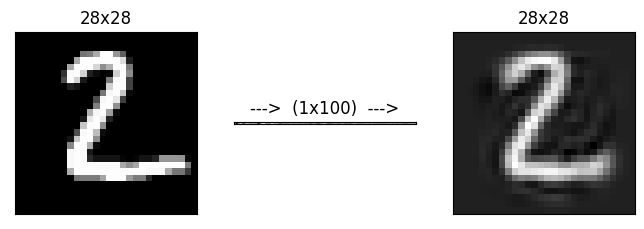

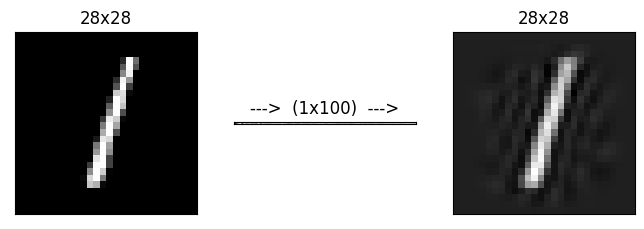

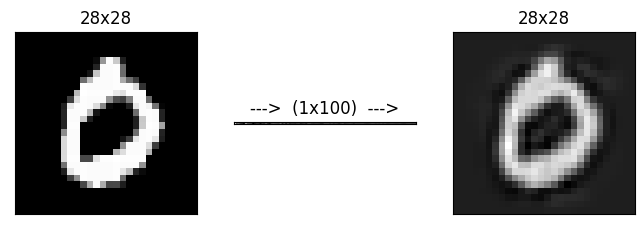

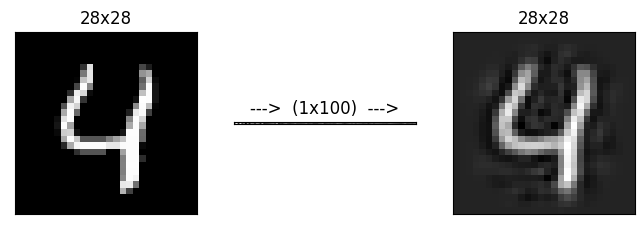

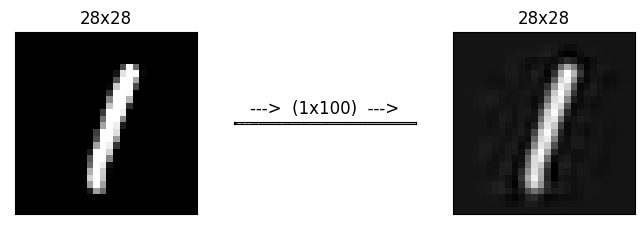

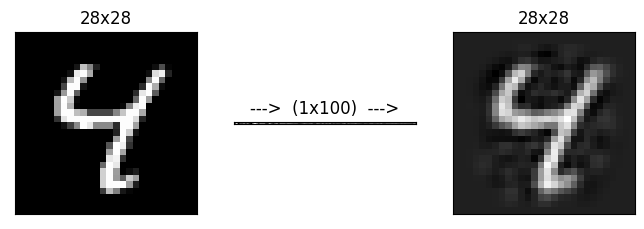

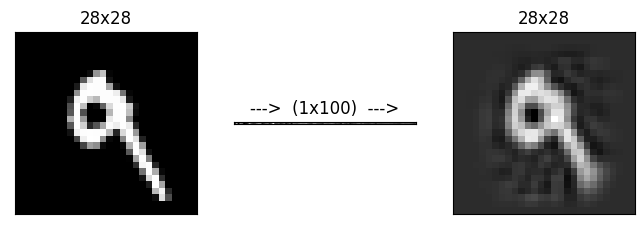

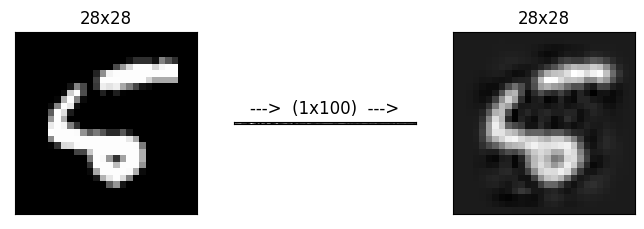

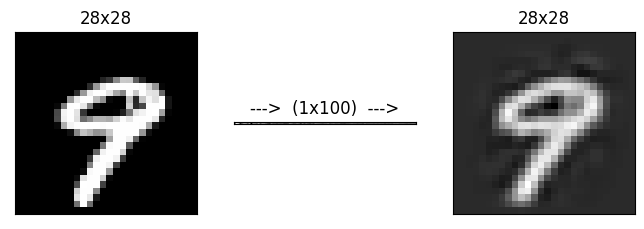

In [5]:
# show some examples of digits (left the original, right after PCA, middle n first components)

sx= int(np.sqrt(n_components))
sy= int(np.sqrt(n_components))
for n_pic in range(1,10):
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic])
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_va[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])




plt.show()

In [6]:
from sklearn.cluster import KMeans

##Choose the number of clusters  in the Kmean method


K=10

kmeans = KMeans(n_clusters=K,max_iter=5000)

# fit the data
kmeans.fit(inp_tr_pca)

# predict
Kmean_pred_tr=kmeans.predict(inp_tr_pca)
Kmean_pred_va=kmeans.predict(inp_va_pca)

In [7]:
Kmean_pred_tr


array([2, 7, 6, ..., 2, 8, 3])

C:\Users\hteim\AppData\Local\Temp\ipykernel_15008\1487899911.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k1)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

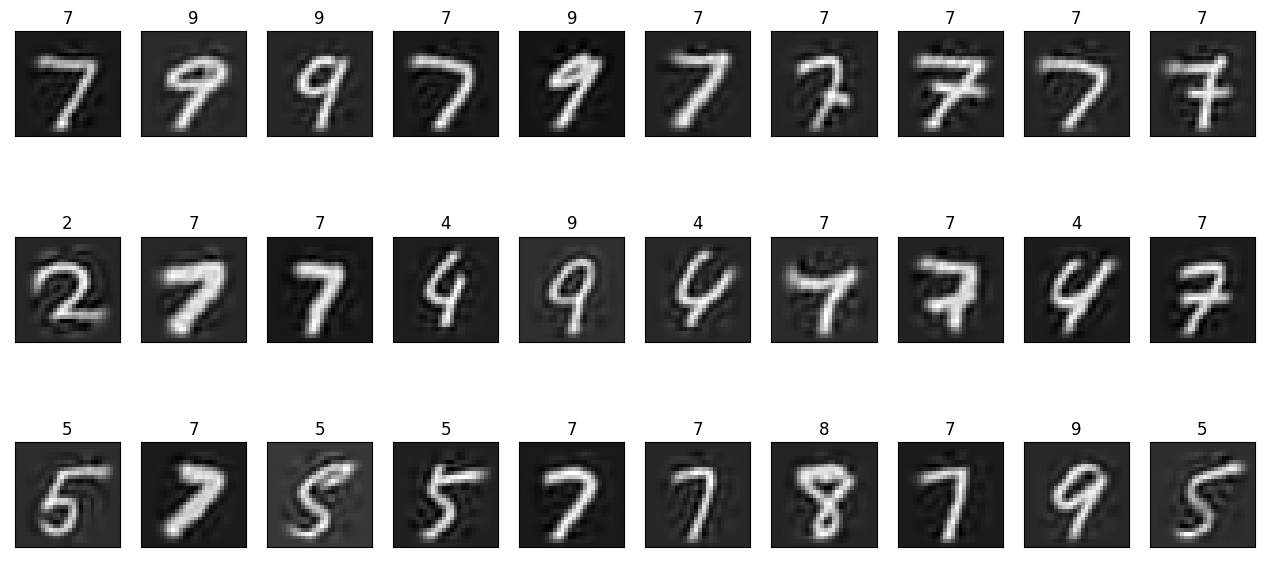

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Done


In [8]:
# show some examples of a cluster (e.g., n_cluster=1) of K cluster. 


n_cluster = 1

n_k=np.where(Kmean_pred_va==n_cluster)[0]




## see some members of the cluster

n_tot=30

plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(0,n_tot):
    n_pic=n_k[k1]
    plt.figure(k1)
    approximation = pca.inverse_transform(inp_va_pca[n_pic])
    ax = fig.add_subplot(int(n_tot/10),10,k1+1,title=str(int(tar_va[n_pic])) )
    plt.subplots_adjust(hspace = .6)
    ax.matshow(approximation.reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    
print('Done')    

([<matplotlib.axis.XTick at 0x21200b95dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

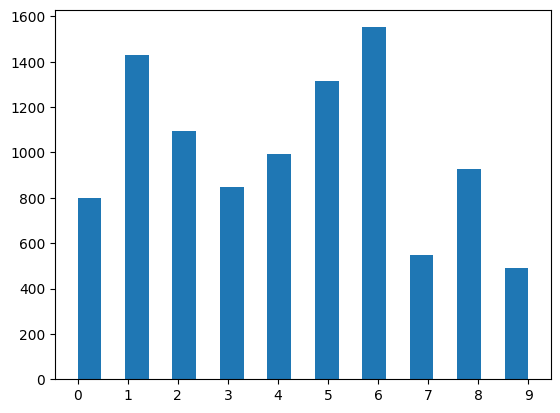

In [9]:
# the distribution on MNIST data (validation) 0
# i.e., number of samples in each cluster.
# from cluster 0 to N=K

plt.hist(Kmean_pred_va,2*K-1)
plt.xticks(np.arange(K))

(10, 100)


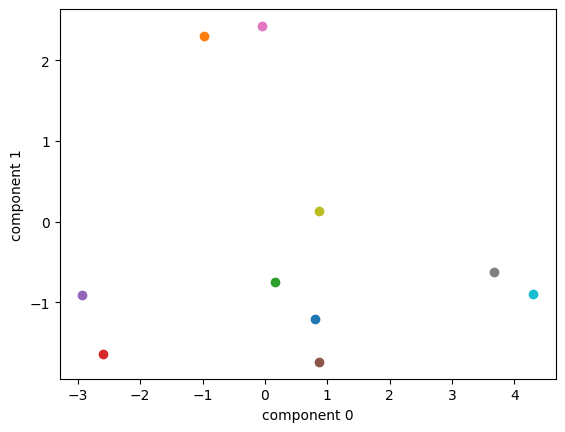

In [10]:
# show the center of the cluster in the two dimention plot (of the selected components):

#choose the two components of PCA
comp_x = 0
comp_y = 1




for k1 in range(K):
  plt.plot(kmeans.cluster_centers_[k1,comp_x],kmeans.cluster_centers_[k1,comp_y],'o')
plt.xlabel('component '+str(comp_x))
plt.ylabel('component '+str(comp_y))

print (np.shape(kmeans.cluster_centers_))

In [11]:
np.where(Kmean_pred_tr==8)

(array([   13,    18,    32, ..., 59982, 59986, 59998], dtype=int64),)

In [12]:
idx= np.where(Kmean_pred_tr==2)[0]

In [13]:
idx

array([    0,     7,    17, ..., 59995, 59996, 59997], dtype=int64)

In [14]:
tar_tr[idx][0:100]

array([5, 3, 8, 8, 8, 8, 5, 3, 8, 8, 8, 8, 5, 3, 8, 3, 8, 3, 2, 3, 3, 8,
       8, 8, 3, 5, 1, 8, 3, 5, 8, 3, 8, 5, 3, 3, 8, 8, 3, 3, 5, 8, 3, 8,
       9, 8, 3, 8, 5, 5, 8, 5, 3, 3, 8, 8, 8, 8, 5, 5, 8, 8, 3, 5, 8, 8,
       8, 3, 3, 8, 3, 8, 8, 3, 3, 8, 5, 3, 3, 5, 5, 3, 8, 3, 3, 3, 8, 8,
       8, 8, 8, 8, 8, 5, 8, 8, 9, 8, 8, 5], dtype=uint8)

# Class activity
1- Change PCA values and  see the result

2- Choose the first 100 principle components and change the number of clusters in Kmean